In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_to_cremad = '/content/drive/My Drive/audio_datasets/cremad/AudioWAV/'
path_to_ravdess = '/content/drive/My Drive/audio_datasets/ravdess/'
path_to_savee = '/content/drive/My Drive/audio_datasets/savee/ALL/'


In [4]:
import os
import glob
import pandas as pd


# List all WAV files in the CREMA-D directory
file_paths = glob.glob(os.path.join(path_to_cremad, "*.wav"))

# Parse the filenames and extract information
data = []
for file_path in file_paths:
    # Extract the filename from the path
    filename = os.path.basename(file_path)
    parts = filename.split("_")
    actor_id = parts[0]
    sentence_code = parts[1]
    emotion_abbr = parts[2]

    # Map the abbreviations to full descriptions (you'll need to fill these based on the dataset's documentation)
    emotion_dict = {
        'ANG': 'Anger',
        'DIS': 'Disgust',
        'FEA': 'Fear',
        'HAP': 'Happy',
        'NEU': 'Neutral',
        'SAD': 'Sad',
        # ... add other emotions as necessary
    }

    emotion = emotion_dict.get(emotion_abbr, 'Unknown')

    # Append the data to our list
    data.append({
        'ActorID': actor_id,
        'SentenceCode': sentence_code,
        'Emotion': emotion,
        'Filename': filename
    })

# Create a DataFrame from the data
df_crema = pd.DataFrame(data)

# Display the DataFrame
df_crema


ActorID SentenceCode  Emotion             Filename
0       1079          TIE  Disgust  1079_TIE_DIS_XX.wav
1       1080          DFA  Neutral  1080_DFA_NEU_XX.wav
2       1080          DFA      Sad  1080_DFA_SAD_XX.wav
3       1079          TIE    Happy  1079_TIE_HAP_XX.wav
4       1079          TSI  Disgust  1079_TSI_DIS_XX.wav
...      ...          ...      ...                  ...
7437    1006          IEO    Happy  1006_IEO_HAP_LO.wav
7438    1006          ITH    Anger  1006_ITH_ANG_XX.wav
7439    1006          ITH      Sad  1006_ITH_SAD_XX.wav
7440    1006          ITS  Neutral  1006_ITS_NEU_XX.wav
7441    1006          ITH  Neutral  1006_ITH_NEU_XX.wav

[7442 rows x 4 columns]

In [5]:

# RAVDESS Emotion mapping
emotion_map_ravdess = {
    '01': 'Neutral', '02': 'Calm', '03': 'Happy', '04': 'Sad',
    '05': 'Anger', '06': 'Fearful', '07': 'Disgust', '08': 'Surprise'
}

# Parse RAVDESS filenames
ravdess_data = []
for subdir in os.listdir(path_to_ravdess):
    subdir_path = os.path.join(path_to_ravdess, subdir)
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            parts = filename.split('-')
            if len(parts) >= 7:  # Ensure the filename has the expected number of parts
                emotion = emotion_map_ravdess.get(parts[2], 'Unknown')
                actor_id = parts[6].replace('.wav', '')
                ravdess_data.append({
                    'ActorID': actor_id,
                    'Filename': filename,
                    'Emotion': emotion
                })

# Create DataFrame
df_ravdess = pd.DataFrame(ravdess_data)

# Display DataFrame
df_ravdess


ActorID                  Filename   Emotion
0         16  03-01-03-02-01-01-16.wav     Happy
1         16  03-01-02-01-02-01-16.wav      Calm
2         16  03-01-06-01-02-02-16.wav   Fearful
3         16  03-01-03-02-01-02-16.wav     Happy
4         16  03-01-05-01-02-02-16.wav     Anger
...      ...                       ...       ...
1435      03  03-01-06-02-02-02-03.wav   Fearful
1436      03  03-01-07-02-02-01-03.wav   Disgust
1437      03  03-01-06-02-01-01-03.wav   Fearful
1438      03  03-01-08-01-01-02-03.wav  Surprise
1439      03  03-01-07-02-02-02-03.wav   Disgust

[1440 rows x 3 columns]

In [6]:
# Path to SAVEE dataset
path_to_savee = '/content/drive/My Drive/audio_datasets/savee/ALL/'

# SAVEE Emotion mapping
emotion_map_savee = {
    'a': 'Anger', 'd': 'Disgust', 'f': 'Fear',
    'h': 'Happy', 'n': 'Neutral', 'sa': 'Sad', 'su': 'Surprise'
}

# Parse SAVEE filenames
savee_data = []
for filename in os.listdir(path_to_savee):
    # Extract the emotion code from the filename
    parts = filename.split('_')
    if len(parts) > 1:
        emotion_code = parts[1][:2]  # Extracting first two characters
        # Check if the code is a single letter (and not 'sa' or 'su')
        if emotion_code[0] in emotion_map_savee and emotion_code not in ['sa', 'su']:
            emotion_code = emotion_code[0]
        emotion = emotion_map_savee.get(emotion_code, 'Unknown')
        actor_id = parts[0]  # Actor ID is the first part
        savee_data.append({
            'ActorID': actor_id,
            'Filename': filename,
            'Emotion': emotion
        })

# Create DataFrame
df_savee = pd.DataFrame(savee_data)

# Display DataFrame
df_savee


ActorID     Filename   Emotion
0        DC   DC_a01.wav     Anger
1        DC   DC_a09.wav     Anger
2        DC   DC_a07.wav     Anger
3        DC   DC_a02.wav     Anger
4        DC   DC_a05.wav     Anger
..      ...          ...       ...
475      KL   KL_n06.wav   Neutral
476      KL   KL_n05.wav   Neutral
477      KL   KL_n26.wav   Neutral
478      KL  KL_su14.wav  Surprise
479      KL   KL_n11.wav   Neutral

[480 rows x 3 columns]

In [7]:
# Check for missing values in CREMA-D dataset
missing_crema = df_crema.isnull().sum()
print("Missing values in CREMA-D dataset:\n", missing_crema)

# Check for missing values in RAVDESS dataset
missing_ravdess = df_ravdess.isnull().sum()
print("\nMissing values in RAVDESS dataset:\n", missing_ravdess)

# Check for missing values in SAVEE dataset
missing_savee = df_savee.isnull().sum()
print("\nMissing values in SAVEE dataset:\n", missing_savee)


Missing values in CREMA-D dataset:
 ActorID         0
SentenceCode    0
Emotion         0
Filename        0
dtype: int64

Missing values in RAVDESS dataset:
 ActorID     0
Filename    0
Emotion     0
dtype: int64

Missing values in SAVEE dataset:
 ActorID     0
Filename    0
Emotion     0
dtype: int64


In [8]:
# Analysis for CREMA-D dataset
print("\nCREMA-D Dataset Analysis:")
print("Total files:", len(df_crema))
print("Unique actors:", df_crema['ActorID'].nunique())
print("Emotion counts:\n", df_crema['Emotion'].value_counts())

# Analysis for RAVDESS dataset
print("\nRAVDESS Dataset Analysis:")
print("Total files:", len(df_ravdess))
print("Unique actors:", df_ravdess['ActorID'].nunique())
print("Emotion counts:\n", df_ravdess['Emotion'].value_counts())

# Analysis for SAVEE dataset
print("\nSAVEE Dataset Analysis:")
print("Total files:", len(df_savee))
print("Unique actors:", df_savee['ActorID'].nunique())
print("Emotion counts:\n", df_savee['Emotion'].value_counts())



CREMA-D Dataset Analysis:
Total files: 7442
Unique actors: 91
Emotion counts:
 Disgust    1271
Sad        1271
Happy      1271
Anger      1271
Fear       1271
Neutral    1087
Name: Emotion, dtype: int64

RAVDESS Dataset Analysis:
Total files: 1440
Unique actors: 24
Emotion counts:
 Happy       192
Calm        192
Fearful     192
Anger       192
Sad         192
Disgust     192
Surprise    192
Neutral      96
Name: Emotion, dtype: int64

SAVEE Dataset Analysis:
Total files: 480
Unique actors: 4
Emotion counts:
 Neutral     120
Anger        60
Disgust      60
Happy        60
Fear         60
Sad          60
Surprise     60
Name: Emotion, dtype: int64


In [9]:
def check_audio_format(df, directory, expected_format=".wav"):
    wrong_format_files = []
    for filename in df['Filename']:
        if not filename.endswith(expected_format):
            wrong_format_files.append(filename)
    return wrong_format_files, len(wrong_format_files)

# Check audio format for each dataset
wrong_format_crema, count_crema = check_audio_format(df_crema, path_to_cremad)
wrong_format_ravdess, count_ravdess = check_audio_format(df_ravdess, path_to_ravdess)
wrong_format_savee, count_savee = check_audio_format(df_savee, path_to_savee)

print("Non-WAV files in CREMA-D:", wrong_format_crema)
print("Non-WAV files in RAVDESS:", wrong_format_ravdess)
print("Non-WAV files in SAVEE:", wrong_format_savee)

print("Count of non-WAV files in CREMA-D:", count_crema)
print("Count of non-WAV files in RAVDESS:", count_ravdess)
print("Count of non-WAV files in SAVEE:", count_savee)


Non-WAV files in CREMA-D: []
Non-WAV files in RAVDESS: []
Non-WAV files in SAVEE: []
Count of non-WAV files in CREMA-D: 0
Count of non-WAV files in RAVDESS: 0
Count of non-WAV files in SAVEE: 0


In [10]:
# CREMA-D
print("CREMA-D Actor Distribution:\n", df_crema['ActorID'].value_counts())

# RAVDESS
print("\nRAVDESS Actor Distribution:\n", df_ravdess['ActorID'].value_counts())

# SAVEE
print("\nSAVEE Actor Distribution:\n", df_savee['ActorID'].value_counts())


CREMA-D Actor Distribution:
 1079    82
1035    82
1020    82
1018    82
1041    82
        ..
1002    81
1076    81
1009    76
1008    76
1019    76
Name: ActorID, Length: 91, dtype: int64

RAVDESS Actor Distribution:
 16    60
21    60
05    60
01    60
04    60
02    60
10    60
09    60
11    60
06    60
07    60
15    60
13    60
08    60
14    60
12    60
22    60
23    60
24    60
18    60
17    60
19    60
20    60
03    60
Name: ActorID, dtype: int64

SAVEE Actor Distribution:
 DC    120
JE    120
JK    120
KL    120
Name: ActorID, dtype: int64


CREMA-D


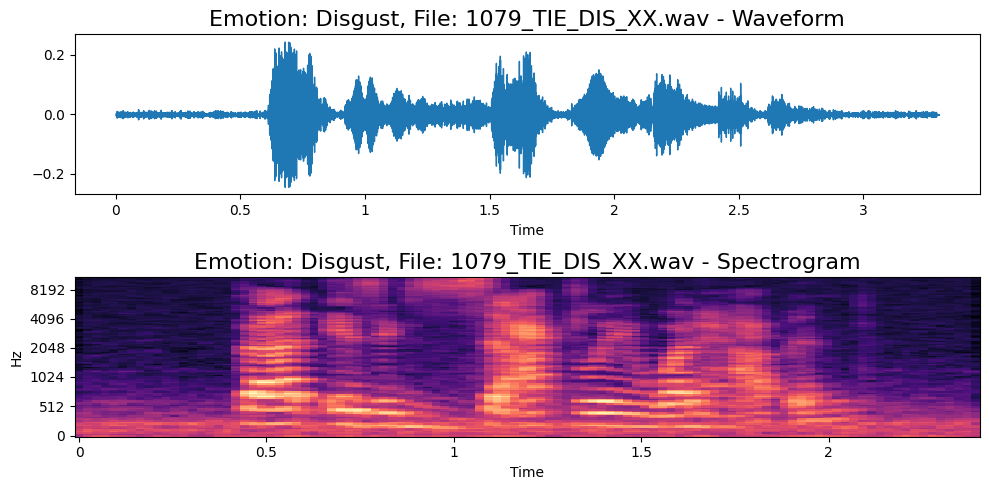

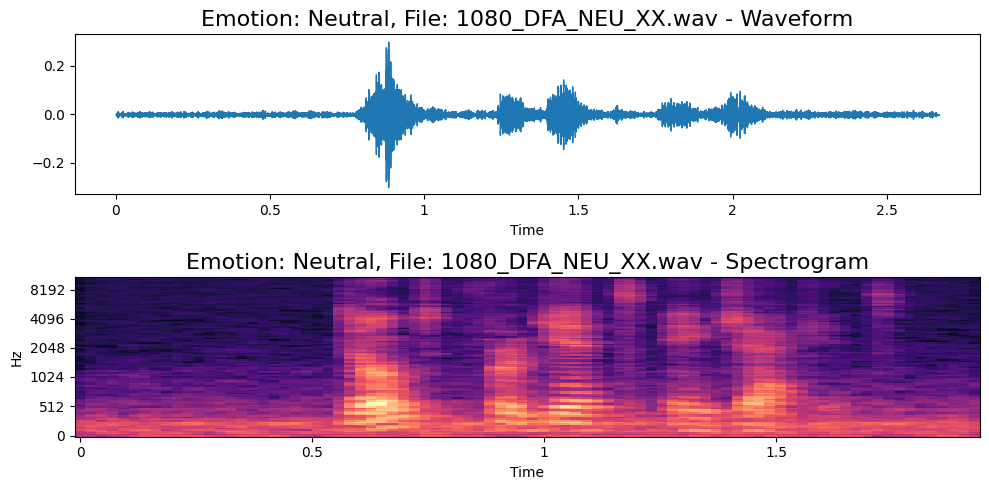

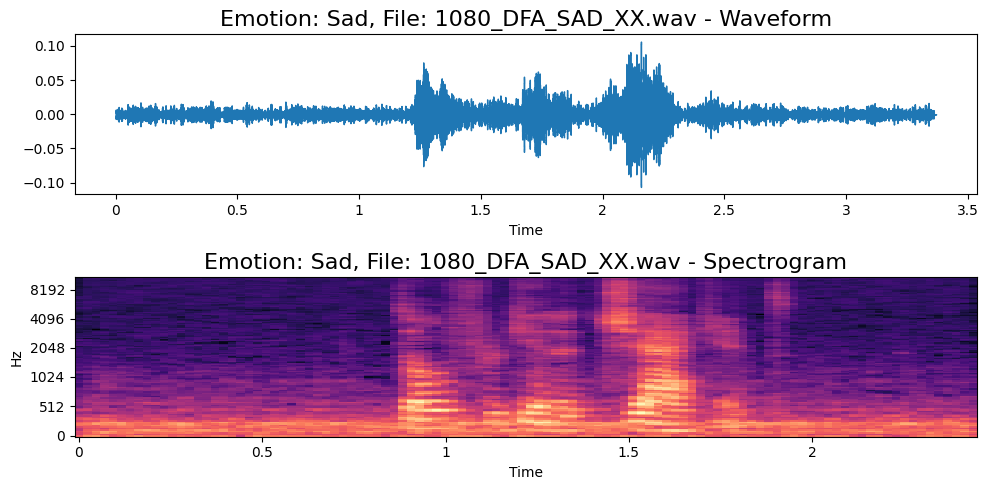

In [15]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

def plot_waveforms_spectrograms_and_audios(df, directory, title):
    emotions = df['Emotion'].unique()
    selected_emotions = emotions[:3]  # Select the first five emotions

    for emotion in selected_emotions:
        # Select the first file for each emotion
        filename = df[df['Emotion'] == emotion]['Filename'].iloc[0]
        path = os.path.join(directory, filename)
        try:
            audio, sr = librosa.load(path, sr=None)

            # Plot waveform
            plt.figure(figsize=(10, 5))
            plt.subplot(2, 1, 1)
            plt.title(f'Emotion: {emotion}, File: {filename} - Waveform', fontsize=16)
            librosa.display.waveshow(audio, sr=sr)

            # Plot spectrogram
            plt.subplot(2, 1, 2)
            plt.title(f'Emotion: {emotion}, File: {filename} - Spectrogram', fontsize=16)
            S = librosa.feature.melspectrogram(y=audio, sr=sr)
            librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')

            plt.tight_layout()
            plt.show()

            # Play the audio
            ipd.display(ipd.Audio(audio, rate=sr))
        except Exception as e:
            print(f"Error processing {path}: {str(e)}")

print("CREMA-D")
# Plot waveforms, spectrograms, and audios for each dataset
plot_waveforms_spectrograms_and_audios(df_crema, path_to_cremad, "CREMA-D Waveforms, Spectrograms, and Audios")


SAVEE DATASET


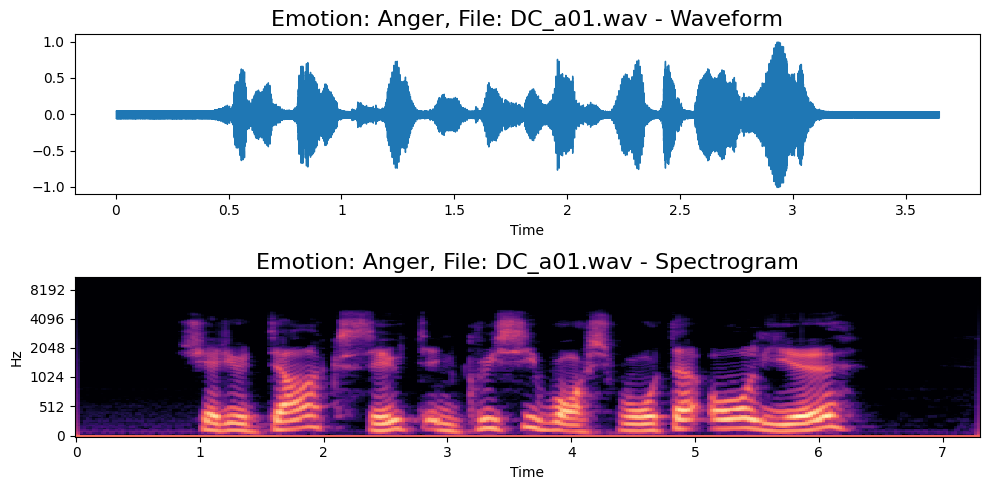

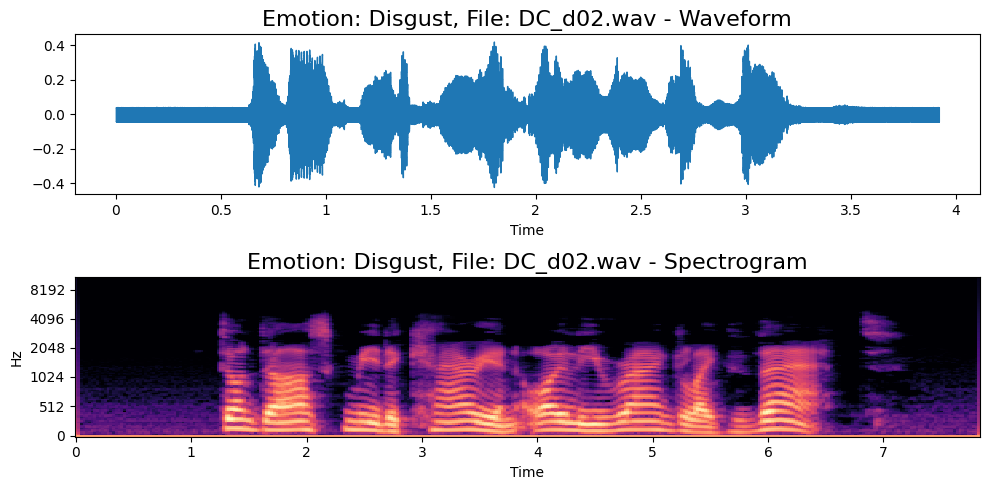

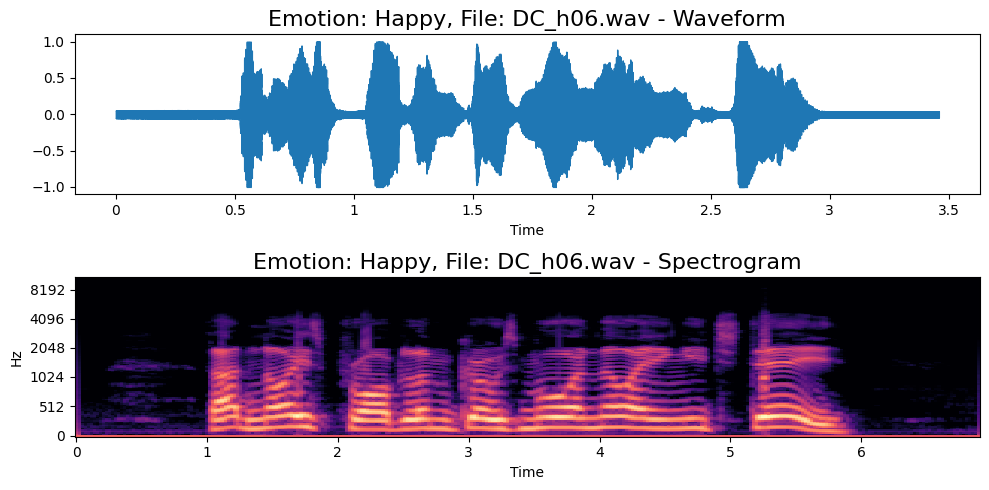

In [16]:
print("SAVEE DATASET")
plot_waveforms_spectrograms_and_audios(df_savee, path_to_savee, "SAVEE Waveforms")

RAVDESS DATASET
Emotion: Fearful, File: 03-01-06-01-02-02-16.wav - Audio Playback


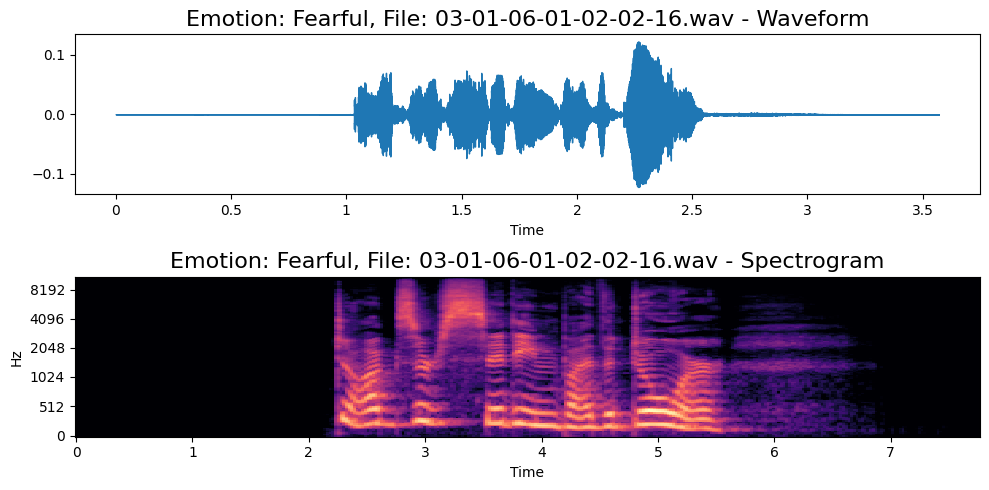

Emotion: Sad, File: 03-01-04-01-01-02-16.wav - Audio Playback


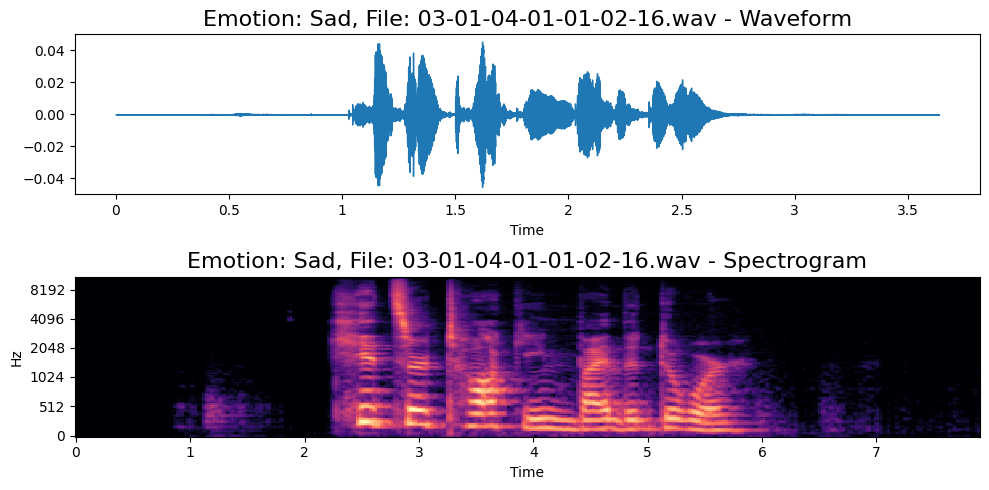

Emotion: Disgust, File: 03-01-07-01-02-01-16.wav - Audio Playback


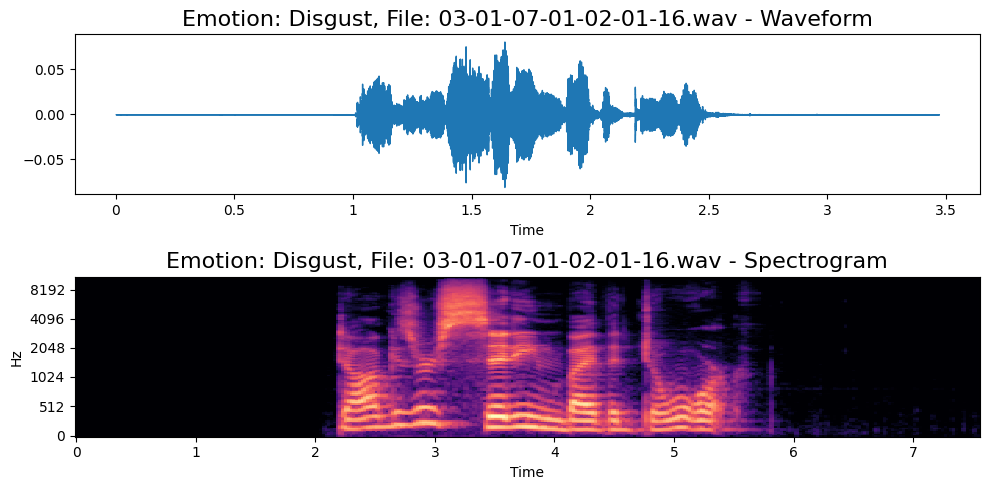

All selected files exist.


In [17]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import random
import IPython.display as ipd

# Define the number of emotions to display
num_emotions_to_display = 3

# Get a list of unique emotions in the dataset
unique_emotions = df_ravdess['Emotion'].unique()

# Randomly select 5 different emotions
selected_emotions = random.sample(list(unique_emotions), num_emotions_to_display)

# Check if the files exist in subdirectories
missing_files = []
print("RAVDESS DATASET")
for emotion in selected_emotions:
    # Get the first file for each selected emotion
    filename = df_ravdess[df_ravdess['Emotion'] == emotion]['Filename'].iloc[0]
    # Iterate through subdirectories
    for root, dirs, files in os.walk(path_to_ravdess):
        # Check if the file exists in the current directory
        file_path = os.path.join(root, filename)
        if os.path.exists(file_path):
            try:
                # Load the audio file
                audio, sr = librosa.load(file_path, sr=None)
                # Display audio playback
                print(f'Emotion: {emotion}, File: {filename} - Audio Playback')
                ipd.display(ipd.Audio(audio, rate=sr))


                # Plotting
                plt.figure(figsize=(10, 5))
                plt.subplot(2, 1, 1)
                plt.title(f'Emotion: {emotion}, File: {filename} - Waveform', fontsize=16)
                librosa.display.waveshow(audio, sr=sr)

                # Plot spectrogram
                plt.subplot(2, 1, 2)
                plt.title(f'Emotion: {emotion}, File: {filename} - Spectrogram', fontsize=16)
                S = librosa.feature.melspectrogram(y=audio, sr=sr)
                librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')

                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
            break  # File found, no need to check other subdirectories
    else:
        # File was not found in any subdirectory
        missing_files.append(filename)

# Print missing files
if missing_files:
    print("The following files are missing:")
    for missing_file in missing_files:
        print(missing_file)
else:
    print("All selected files exist.")


In [18]:
# Concatenate the dataframes
combined_df = pd.concat([df_crema, df_ravdess, df_savee], ignore_index=True)

# Save the combined dataframe as a CSV file
combined_df.to_csv('/content/drive/My Drive/audio_datasets/combined_dataset.csv', index=False)

# Display the first few rows of the combined dataframe
combined_df.head()


ActorID SentenceCode  Emotion             Filename
0    1079          TIE  Disgust  1079_TIE_DIS_XX.wav
1    1080          DFA  Neutral  1080_DFA_NEU_XX.wav
2    1080          DFA      Sad  1080_DFA_SAD_XX.wav
3    1079          TIE    Happy  1079_TIE_HAP_XX.wav
4    1079          TSI  Disgust  1079_TSI_DIS_XX.wav

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
combined_df = pd.read_csv('/content/drive/My Drive/audio_datasets/combined_dataset.csv')

# Display basic information about the dataset
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9362 entries, 0 to 9361
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ActorID       9362 non-null   object
 1   SentenceCode  7442 non-null   object
 2   Emotion       9362 non-null   object
 3   Filename      9362 non-null   object
dtypes: object(4)
memory usage: 292.7+ KB
None


In [20]:
# Print the emotion distribution
emotion_counts = combined_df['Emotion'].value_counts()
for emotion, count in emotion_counts.items():
    print(f"- {emotion}: {count}")


- Disgust: 1523
- Sad: 1523
- Happy: 1523
- Anger: 1523
- Fear: 1331
- Neutral: 1303
- Surprise: 252
- Calm: 192
- Fearful: 192


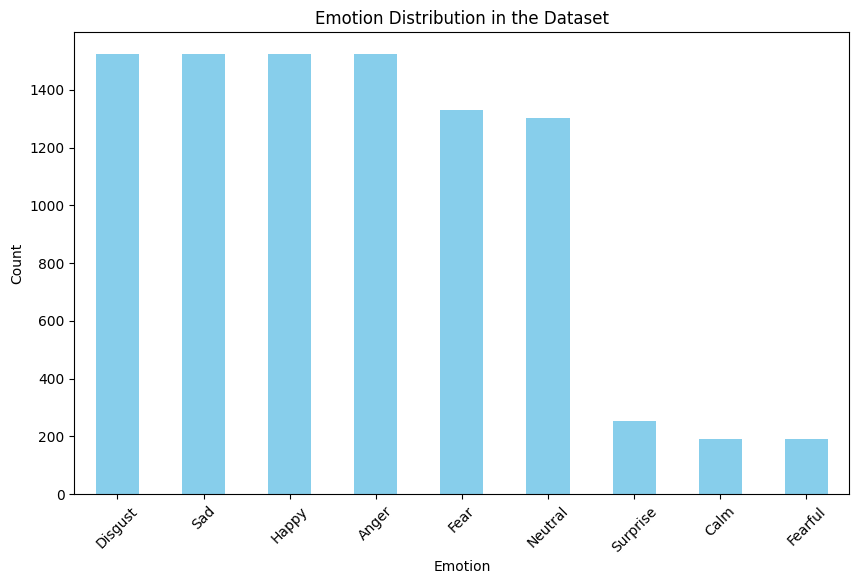

In [21]:
# Visualize the distribution of emotions
plt.figure(figsize=(10, 6))
combined_df['Emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [26]:
import noisereduce as nr

# Function to apply noise reduction and display audio
def apply_noise_reduction_and_display(audio, sr, title):
    # Apply noise reduction using noisereduce library
    reduced_audio = nr.reduce_noise(y=audio, sr=sr)

    # Display the original and reduced audio
    print(f"Original {title} Audio:")
    ipd.display(ipd.Audio(audio, rate=sr))
    print(f"Noise-Reduced {title} Audio:")
    ipd.display(ipd.Audio(reduced_audio, rate=sr))

# Apply noise reduction to CREMA-D samples
for emotion in selected_emotions:
    filename = df_crema[df_crema['Emotion'] == emotion]['Filename'].iloc[0]
    path = os.path.join(path_to_cremad, filename)
    audio, sr = librosa.load(path, sr=None)
    apply_noise_reduction_and_display(audio, sr, f'CREMA-D {emotion}')

# Apply noise reduction to RAVDESS samples
for emotion in selected_emotions:
    filename = df_ravdess[df_ravdess['Emotion'] == emotion]['Filename'].iloc[0]
    for root, dirs, files in os.walk(path_to_ravdess):
        file_path = os.path.join(root, filename)
        if os.path.exists(file_path):
            audio, sr = librosa.load(file_path, sr=None)
            apply_noise_reduction_and_display(audio, sr, f'RAVDESS {emotion}')
            break


Original CREMA-D Sad Audio:


Noise-Reduced CREMA-D Sad Audio:


IndexError: ignored

In [25]:
pip install noisereduce


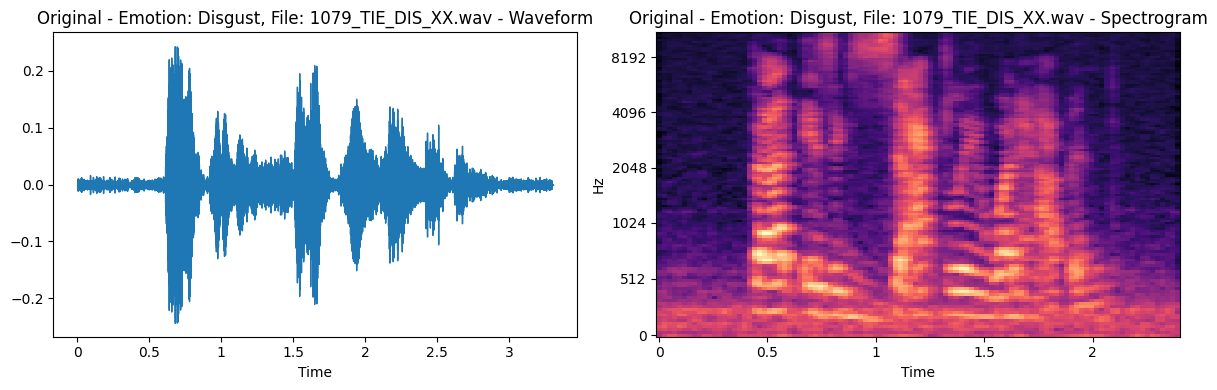

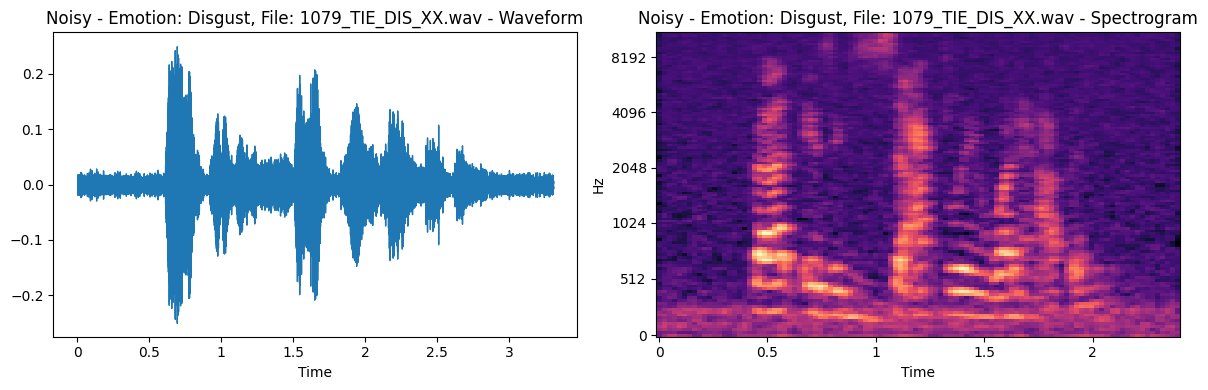

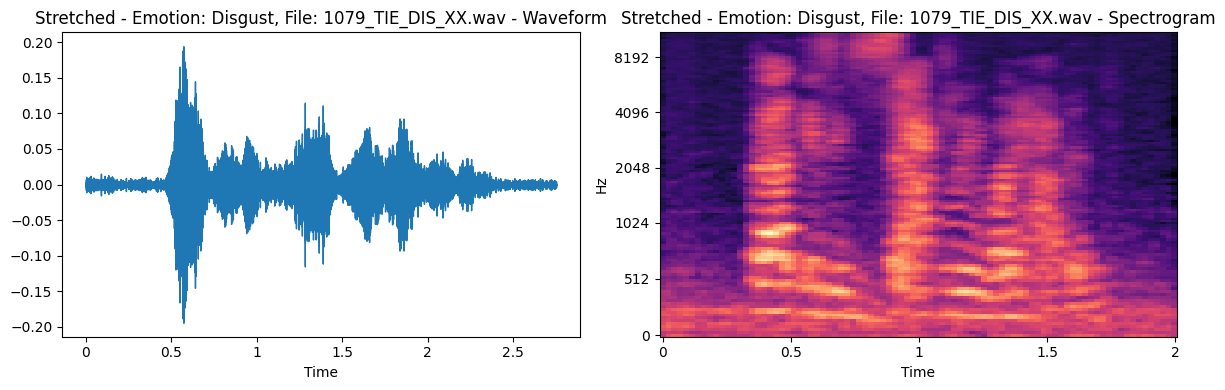

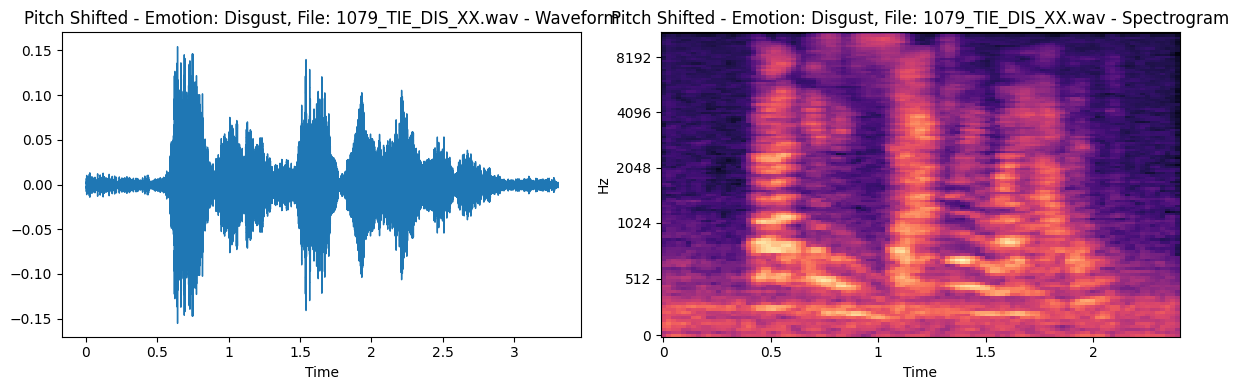

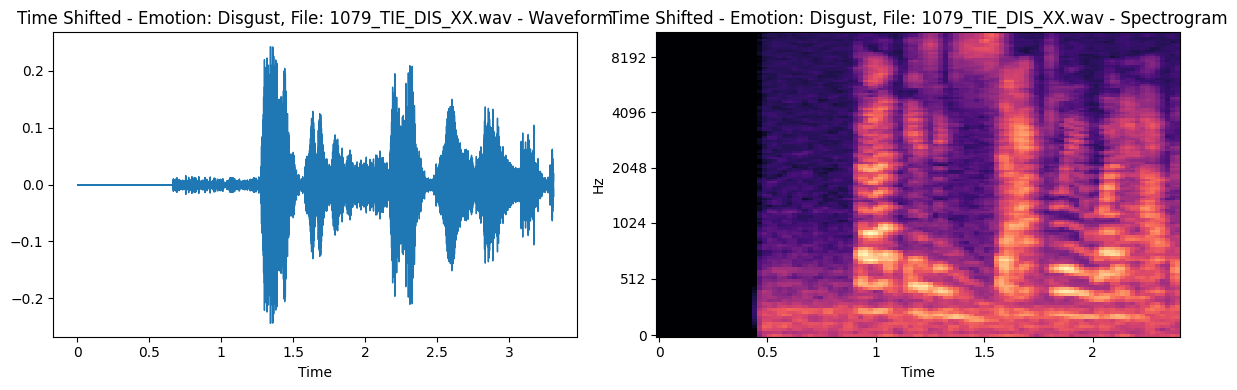

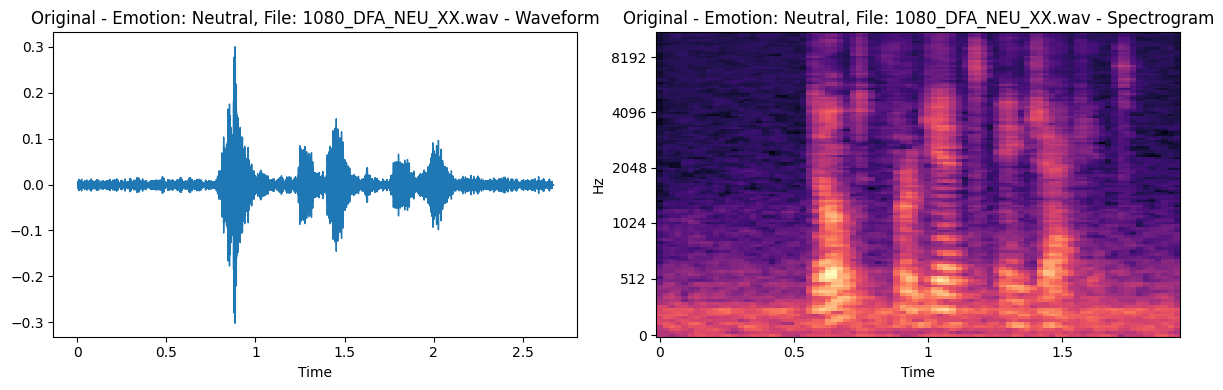

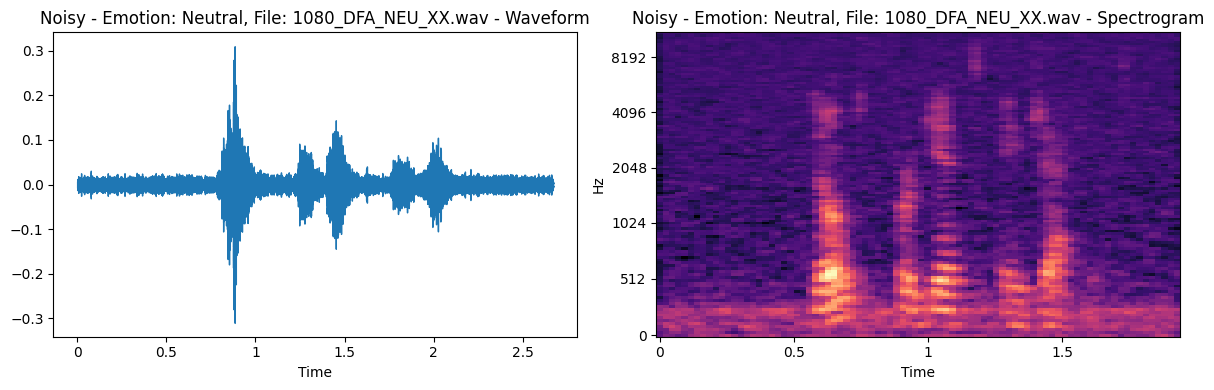

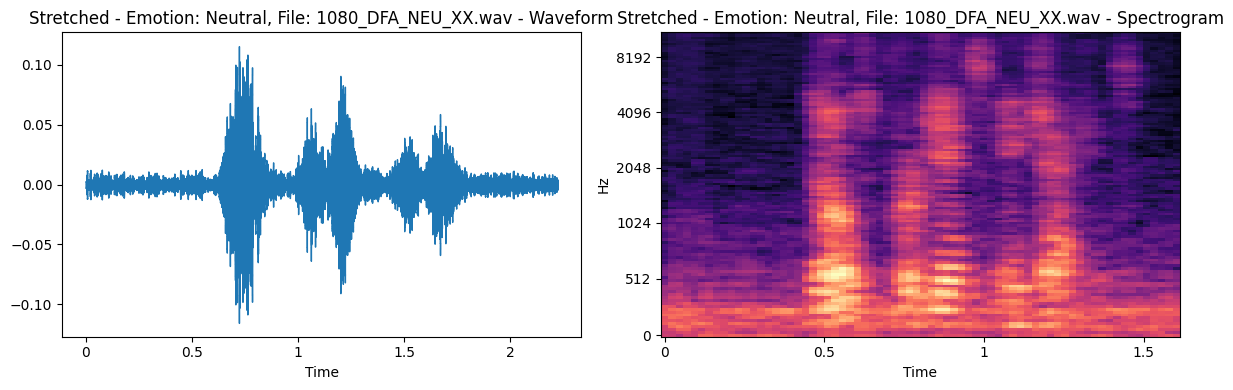

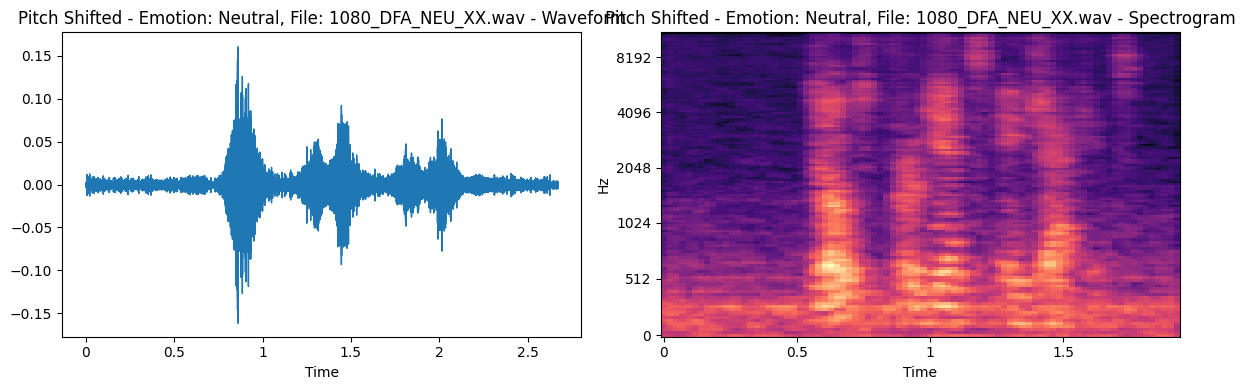

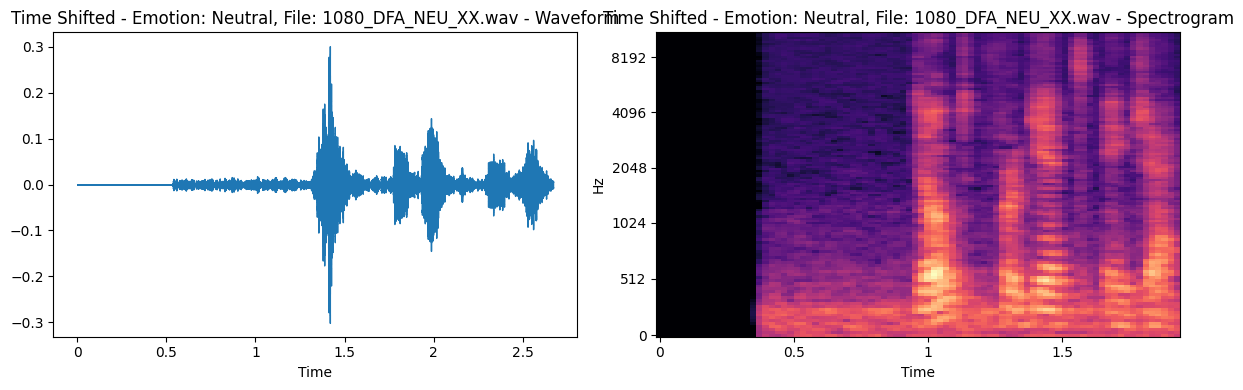

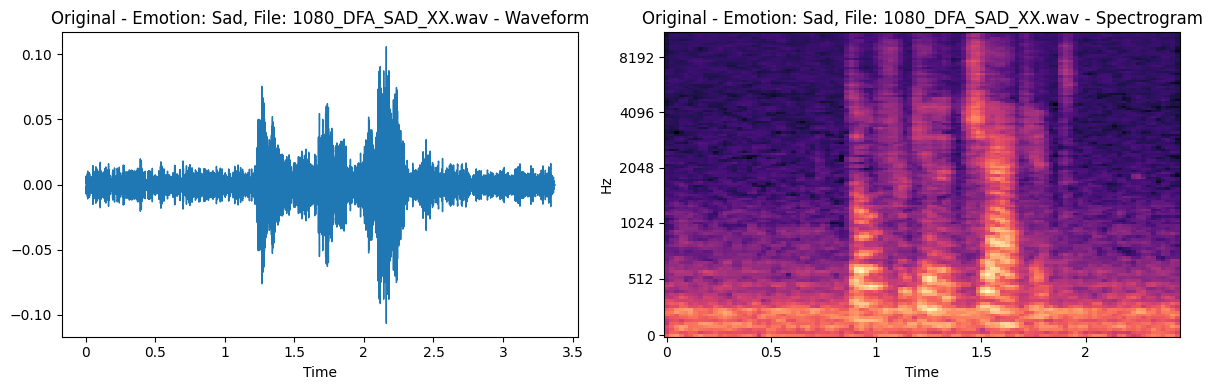

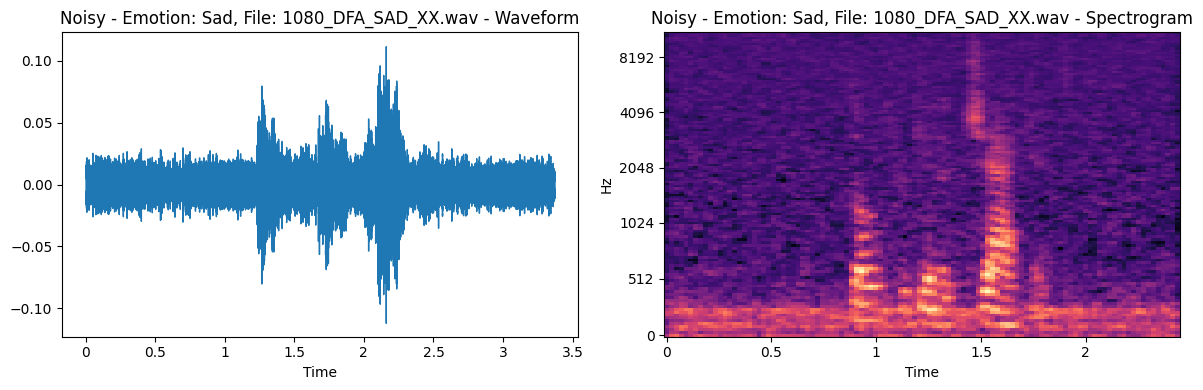

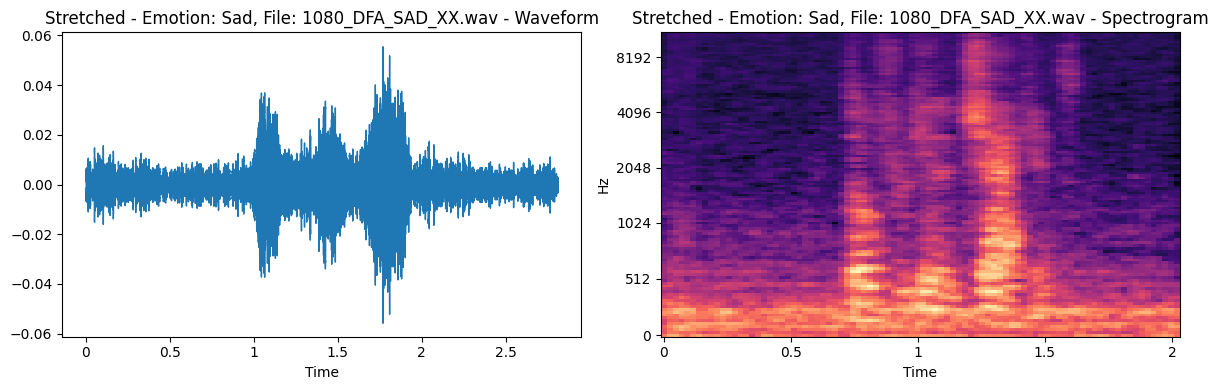

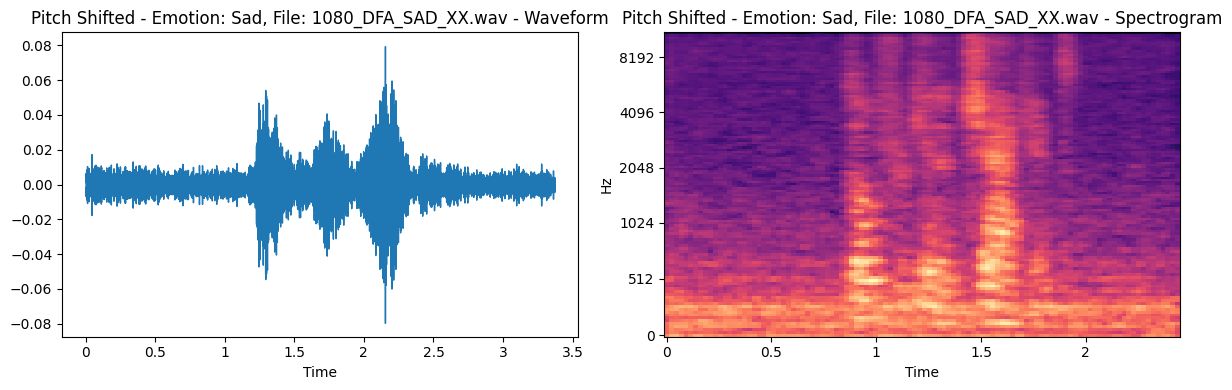

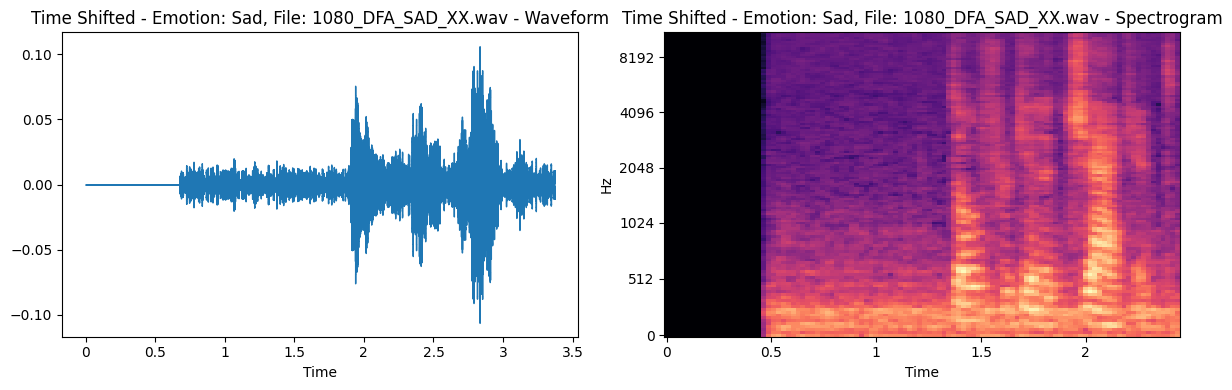

In [23]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
# Function to plot waveform and spectrogram
def plot_waveform_spectrogram(audio, sr, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Waveform')
    librosa.display.waveshow(audio, sr=sr)

    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Spectrogram')
    S = librosa.feature.melspectrogram(y=audio, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')

    plt.tight_layout()
    plt.show()

# Load the first five audio files from CREMA-D
selected_emotions = df_crema['Emotion'].unique()[:3]

for emotion in selected_emotions:
    # Select the first file for each emotion
    filename = df_crema[df_crema['Emotion'] == emotion]['Filename'].iloc[0]
    path = os.path.join(path_to_cremad, filename)
    try:
        audio, sr = librosa.load(path, sr=None)

        # Plot the original waveform and spectrogram
        plot_waveform_spectrogram(audio, sr, f'Original - Emotion: {emotion}, File: {filename}')

        # Data augmentation functions
        def add_noise(audio, noise_level=0.005):
            noise = np.random.normal(0, noise_level, len(audio))
            noisy_audio = audio + noise
            return noisy_audio

        def time_stretch(audio, rate=1.2):
            stretched_audio = librosa.effects.time_stretch(audio, rate=rate)
            return stretched_audio

        def pitch_shift(audio, n_steps=2):
            shifted_audio = librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)
            return shifted_audio

        def time_shift(audio, shift_factor=0.2):
            shift_samples = int(len(audio) * shift_factor)
            if shift_samples >= 0:
                shifted_audio = np.pad(audio[:-shift_samples], (shift_samples, 0), mode='constant')
            else:
                shifted_audio = np.pad(audio[-shift_samples:], (0, -shift_samples), mode='constant')
            return shifted_audio

        # Apply data augmentation and visualize results

        # 1. Noise Injection
        noisy_audio = add_noise(audio)
        plot_waveform_spectrogram(noisy_audio, sr, f'Noisy - Emotion: {emotion}, File: {filename}')
        ipd.display(ipd.Audio(noisy_audio, rate=sr))  # Display the noisy audio

        # 2. Time Stretching
        stretched_audio = time_stretch(audio, rate=1.2)
        plot_waveform_spectrogram(stretched_audio, sr, f'Stretched - Emotion: {emotion}, File: {filename}')
        ipd.display(ipd.Audio(stretched_audio, rate=sr))  # Display the stretched audio

        # 3. Pitch Shifting
        shifted_audio = pitch_shift(audio, n_steps=2)
        plot_waveform_spectrogram(shifted_audio, sr, f'Pitch Shifted - Emotion: {emotion}, File: {filename}')
        ipd.display(ipd.Audio(shifted_audio, rate=sr))  # Display the pitch shifted audio

        # 4. Time Shifting
        shifted_audio = time_shift(audio, shift_factor=0.2)
        plot_waveform_spectrogram(shifted_audio, sr, f'Time Shifted - Emotion: {emotion}, File: {filename}')
        ipd.display(ipd.Audio(shifted_audio, rate=sr))  # Display the time shifted audio

    except Exception as e:
        print(f"Error processing {path}: {str(e)}")
